In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


%matplotlib inline
sns.set(rc={'figure.figsize': [10, 10]}, font_scale=1.2)

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data.csv')

In [3]:
df

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1


In [4]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [6]:
x = df[['not.fully.paid', 'int.rate', 'installment', 'inq.last.6mths', 'revol.bal','fico','dti','log.annual.inc','days.with.cr.line','revol.util','delinq.2yrs','pub.rec']]
y = df['credit.policy']

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=90)

In [8]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [9]:
model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [10]:
y_pred = model.predict(x_test)
y_pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [11]:
y_test

964     1
7804    0
2021    1
3105    1
6181    1
       ..
8330    0
9176    0
5221    1
6416    1
1786    1
Name: credit.policy, Length: 1916, dtype: int64

In [12]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [13]:
confusion_matrix(y_test, y_pred)

array([[ 204,  161],
       [  47, 1504]], dtype=int64)

In [14]:
accuracy_score(y_test, y_pred)

0.8914405010438413

## SVM

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [16]:
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [17]:
from sklearn.svm import SVC

In [18]:
model = SVC(kernel='linear')

In [19]:
model.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [20]:
y_pred = model.predict(x_test)
y_pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [21]:
y_test

964     1
7804    0
2021    1
3105    1
6181    1
       ..
8330    0
9176    0
5221    1
6416    1
1786    1
Name: credit.policy, Length: 1916, dtype: int64

In [22]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [23]:
confusion_matrix(y_test, y_pred)

array([[ 222,  143],
       [  46, 1505]], dtype=int64)

In [24]:
accuracy_score(y_test, y_pred)

0.901356993736952

## KNN

In [25]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

In [26]:
model.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [27]:
y_pred = model.predict(x_test)
y_pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [28]:
y_test

964     1
7804    0
2021    1
3105    1
6181    1
       ..
8330    0
9176    0
5221    1
6416    1
1786    1
Name: credit.policy, Length: 1916, dtype: int64

In [29]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [30]:
confusion_matrix(y_test, y_pred)

array([[ 208,  157],
       [  26, 1525]], dtype=int64)

In [31]:
accuracy_score(y_test, y_pred)

0.9044885177453027

In [32]:
scores = []
for k in range(1, 50):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    score = accuracy_score(y_test, y_pred)
    scores.append(score)

In [33]:
scores

[0.9039665970772442,
 0.8877870563674322,
 0.9081419624217119,
 0.9112734864300627,
 0.9044885177453027,
 0.9076200417536534,
 0.9024008350730689,
 0.9123173277661796,
 0.9029227557411273,
 0.9086638830897703,
 0.901356993736952,
 0.9039665970772442,
 0.8966597077244259,
 0.9008350730688935,
 0.8940501043841336,
 0.8950939457202505,
 0.8924843423799582,
 0.8961377870563675,
 0.8914405010438413,
 0.894572025052192,
 0.889874739039666,
 0.8956158663883089,
 0.8867432150313153,
 0.889874739039666,
 0.8830897703549061,
 0.8867432150313153,
 0.8825678496868476,
 0.8846555323590815,
 0.8836116910229646,
 0.8862212943632568,
 0.8836116910229646,
 0.8846555323590815,
 0.8804801670146137,
 0.8825678496868476,
 0.8789144050104384,
 0.8820459290187892,
 0.8783924843423799,
 0.8799582463465553,
 0.8789144050104384,
 0.8783924843423799,
 0.8778705636743215,
 0.8794363256784968,
 0.8752609603340292,
 0.877348643006263,
 0.8763048016701461,
 0.8768267223382046,
 0.8757828810020877,
 0.876304801670146

In [34]:
np.argmax(scores) + 1

8

In [35]:
np.max(scores)

0.9123173277661796

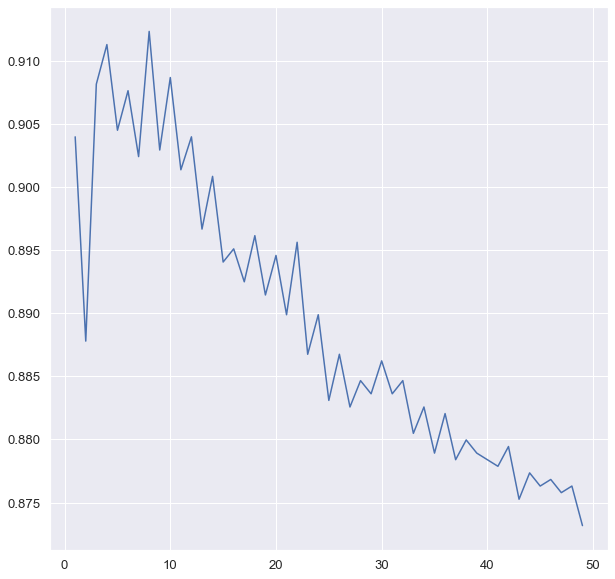

In [36]:
plt.plot(range(1, 50), scores)

In [37]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=np.argmax(scores) + 1)

In [38]:
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
accuracy_score(y_test, y_pred)

0.9123173277661796

In [39]:
confusion_matrix(y_test, y_pred)

array([[ 220,  145],
       [  23, 1528]], dtype=int64)

## Decision Tree

In [40]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [41]:
model.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [42]:
y_pred = model.predict(x_test)
y_pred

array([1, 0, 1, ..., 1, 1, 1], dtype=int64)

In [43]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [44]:
confusion_matrix(y_test, y_pred)

array([[ 352,   13],
       [   5, 1546]], dtype=int64)

In [45]:
accuracy_score(y_test, y_pred)

0.9906054279749478